   # Perceptron simples para classificação de duas espécies de flores do gênero Iris
   #### Universidade Federal de Uberlândia - Inteligência Computacional
                        6 de junho de 2018


             Arthur Ribeiro - Bruno Moreira - Ian Resende
                     Gabriel Ferraz - Kim Ruan  
     
     
     

###### Resumo
   As Redes Neurais Artificiais, buscam, a partir do interligamento de unidades individuais denominadas neurônios artificiais, modelor o comportamento do cérebro para a resolução de problemas. São amplamente utilizadas em problemas de classificação, onde é necessário associar uma amostra a um conjunto de classes predefinidas
    
       Este trabalho apresenta o uso de um Perceptron Simples para 
       realizar a classificação de duas espécies de flores do gênero 
       Iris.


Palavras chaves: Redes neuras, RNA, Perceptron, Iris.

###### Introdução

   Neste trabalho uma camada única, constituída de um Perceptron Simples com 4 pesos independentes, é utilizada para realizar a classificação de duas espécies de flores do gênero Iris, Iris Setosa e Iris Versicolor, dado o tamanho e largura das sépalas, assim como o tamanho e largura das pétalas.
    
        O relatório está organizado da seguinte forma: a Seção 2, apresenta a contextualização do problema. A Seção 3, descreve a metodologia utilizada para o desenvolvimento do projeto. Os resultados e suas respectivas análises são apresentados na Seção 4. Finalmente, a Seção 5 apresenta as conclusões do trabalho.

###### 2. Problema Abordado
    Iris é um género de plantas com flor, muito apreciado pelas suas diversas espécies, que ostentam flores de cores muito vivas.
    
    Espécies de Iris podem ser utilizadas desde filtragem de água, produção de bebidas destiladas até produção de veneno para armamentos (flechas envenenadas do período medieval). Devido a sua diversidade de usos, é necessário que o produtor saiba diferenciar suas espécies a fim de não causar problemas na produção do produto final, seja este um perfume, bebida, ou qualquer outro fim.
    
    Para o uso correto da planta, é necessário então, poder classificar a mesma em sua devida espécie, e por isso, foi proposto a solução de um classificador que possa predizer de qual espécie determinada planta é, dado uma situação onde um botânico precisa dessa informação para prosseguir com seu planejamento e cultivo

###### Metodologia
Essa seção descreve a construção e arquitetura da rede neural artificial utilizada no projeto.

In [2]:
# -*- coding: utf-8 -*-
#https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
%matplotlib inline

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import display
from IPython.display import Image
import seaborn as sns
sns.set()

###### 3.1 Exploração dos dados para planejamento da arquitetura

In [23]:
iris = pd.read_csv('train.csv')
display(iris.head(5))


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Como podemos observar, o dataset possui 4 features em cada linha, juntamente com um identificador e a sua respectiva espécie, dada pelas strings:
        
           Iris-setosa / Iris-versicolor
           
Iremos agora, explorar e demonstrar a justificativa de nossa escolha pela arquitetura utilizada neste trabalho, consequência da exploração das distribuições das features em cada uma das espécies do dataset.

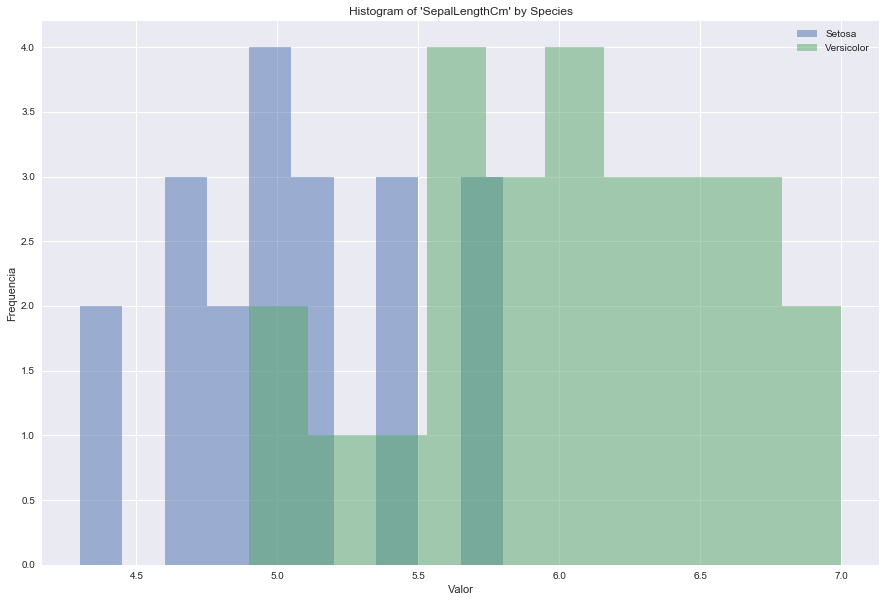

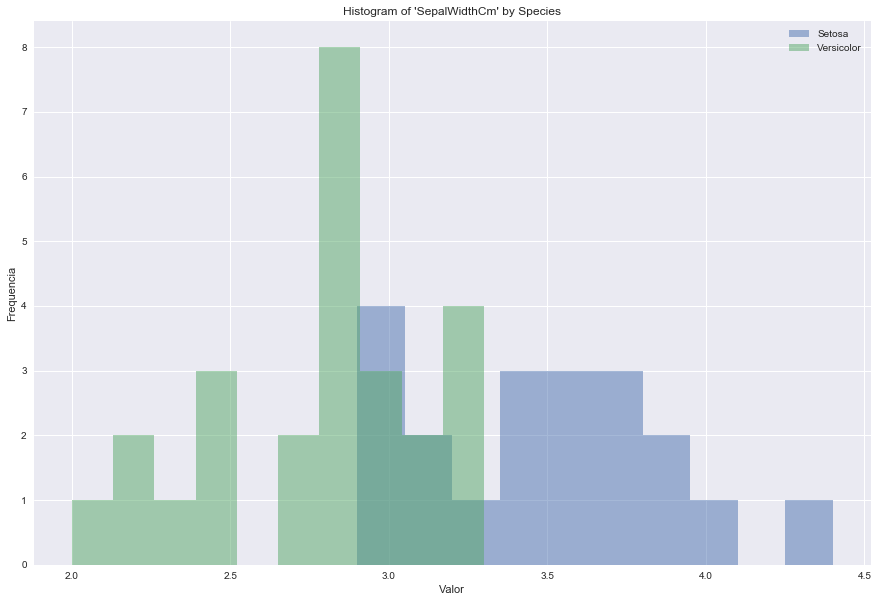

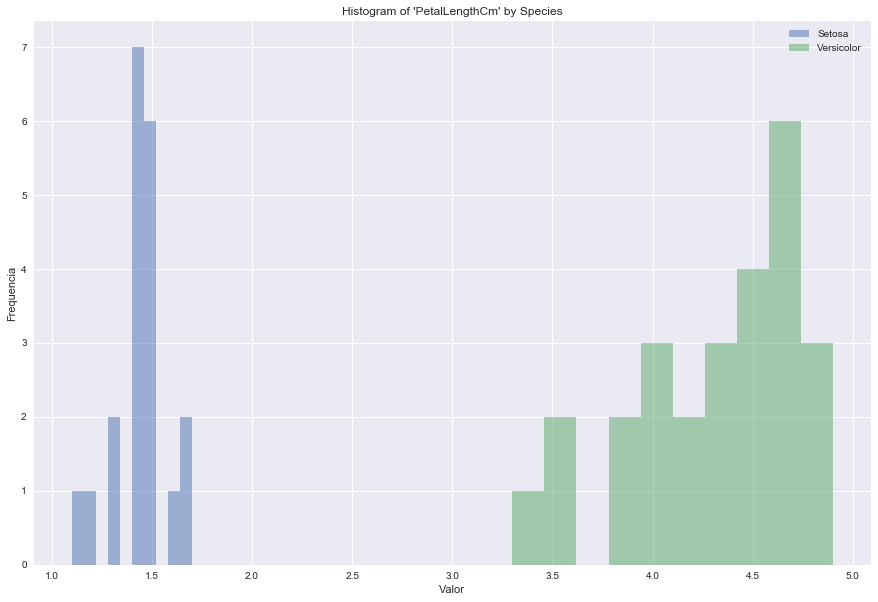

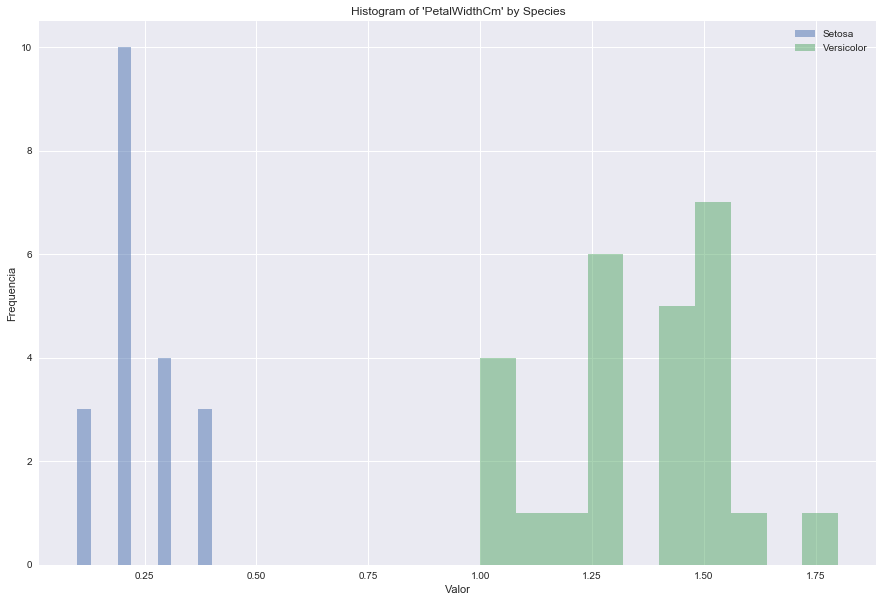

In [24]:
def plot_histogram_dv(feature,labels):
    plt.figure(figsize=(15,10))
    plt.hist(list(feature[labels=='Iris-setosa']), alpha=0.5, label='Setosa')
    plt.hist(list(feature[labels=='Iris-versicolor']), alpha=0.5, label='Versicolor')
    plt.title("Histogram of '{var_name}' by Species".format(var_name=feature.name))
    plt.xlabel("Valor")
    plt.ylabel("Frequencia")
    plt.legend(loc="upper right")
    plt.show()
    
plot_histogram_dv(iris['SepalLengthCm'], iris['Species'])
plot_histogram_dv(iris['SepalWidthCm'], iris['Species'])
plot_histogram_dv(iris['PetalLengthCm'], iris['Species'])
plot_histogram_dv(iris['PetalWidthCm'], iris['Species'])

###### 3.2 Arquitetura do Perceptron
   Para solucionar o problema discutido, deve-se classificar a flor entre as classes Iris-setosa(azul) e Iris-versicolor(verde), como mostrado anteriormente, podemos então perceber, que pelas features PetalLengthCm e PetalWidthCm existe uma diferença perceptível entre as duas classes de espécies, onde é possível, assim como demonstrado abaixo, enquadrar este problema como linearmente separável.

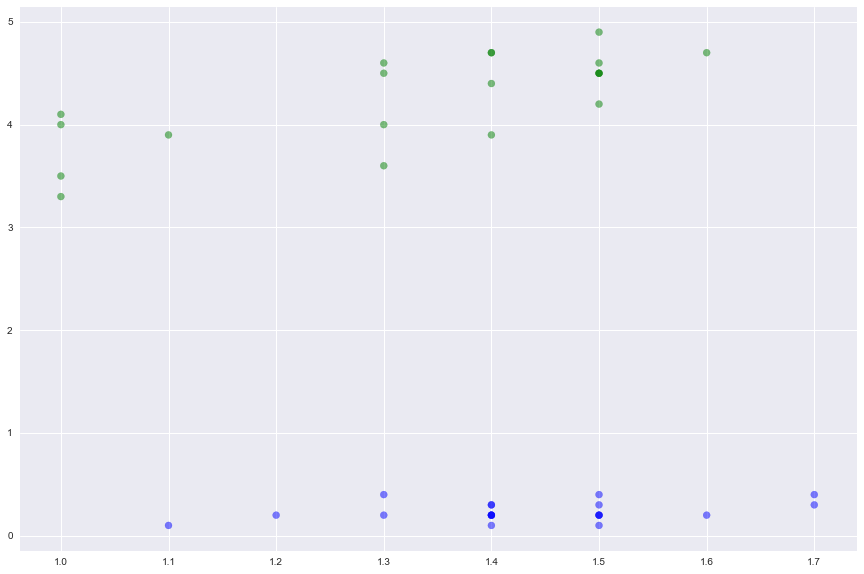

In [25]:
setosas_length = []
versicolors_length = []
setosas_width = []
versicolors_width = []

#Fazendo um array de cada uma das especies da feature PetalLengthCm
for index, row in iris.iterrows():
    if row['Species'] == 'Iris-setosa':
        setosas_length.append(row['PetalLengthCm'])
        setosas_width.append(row['PetalWidthCm'])
    else:
        versicolors_length.append(row['PetalLengthCm'])
        versicolors_width.append(row['PetalWidthCm'])
        
#Fazendo com que os dois arrays sejam do mesmo tamanho para visualizacao
versicolors_length = versicolors_length[:len(setosas_length)]
versicolors_width = versicolors_width[:len(setosas_width)]

#Plotando um scatter plot das duas features linearmente separaveis
plt.figure(figsize=(15,10))
plt.scatter(setosas_length, setosas_width, c=["b", "b"], alpha=0.5)
plt.scatter(versicolors_width, versicolors_length, c=["g", "g"], alpha=0.5)
plt.show()

###### 3.3 Pre processamento e preparamento do dataset 
Dividimos o dataset em 80% para treino e 20% para testes de performance e métricas de acerto.

Depois desta etapa de seleção, criamos um array que servirá como target, de cada uma das posições do dataset original para comparação posterior

In [26]:
#randomizando ordem de linhas no dataframe
iris = iris.sample(frac=1).reset_index(drop=True)

#calculando tamanho do dataset e indice do corte
iris_len = len(iris)
iris_split_size = int(iris_len * 0.8)

iris_train = iris[:iris_split_size]
iris_test = iris[iris_split_size:]    

#criando array de labels
labels_train = iris[:iris_split_size]['Species']
labels_test = iris[iris_split_size:]['Species']

display(iris_test.head(5))
display(labels_test.head(5))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,73,6.3,2.5,4.9,1.5,Iris-versicolor
37,74,6.1,2.8,4.7,1.2,Iris-versicolor
38,68,5.8,2.7,4.1,1.0,Iris-versicolor
39,11,5.4,3.7,1.5,0.2,Iris-setosa
40,2,4.9,3.0,1.4,0.2,Iris-setosa


36    Iris-versicolor
37    Iris-versicolor
38    Iris-versicolor
39        Iris-setosa
40        Iris-setosa
Name: Species, dtype: object

###### Continuação 3.2:

Criamos então, uma cópia do dataset que possui uma nova coluna chamada label, que classifica as espécies da seguinte forma:
                
      Iris-setosa : Label = 0
      Iris-versicolor : Label = 1

In [27]:
iris_labeled_train = iris_train.copy()

for i in range(0, len(iris_labeled_train)):
    if iris_train['Species'][i] == 'Iris-setosa':
        iris_labeled_train.loc[i, 'label'] = 1
    else:
        iris_labeled_train.loc[i, 'label'] = 0

display(iris_labeled_train.tail(5))




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
31,18,5.1,3.5,1.4,0.3,Iris-setosa,1.0
32,9,4.4,2.9,1.4,0.2,Iris-setosa,1.0
33,75,6.4,2.9,4.3,1.3,Iris-versicolor,0.0
34,19,5.7,3.8,1.7,0.3,Iris-setosa,1.0
35,58,4.9,2.4,3.3,1.0,Iris-versicolor,0.0


###### 3.3 Características da arquitetura

Com quatro entradas por amostra, o neurônio calcula o sinal de ativação, onde o peso das duas features que vimos anteriormente, torna possível essa divisão linear entre as classes, que por sua vez, é submetido à função de ativação.

Foi utilizada como função de ativação a função sigmóide dada por:

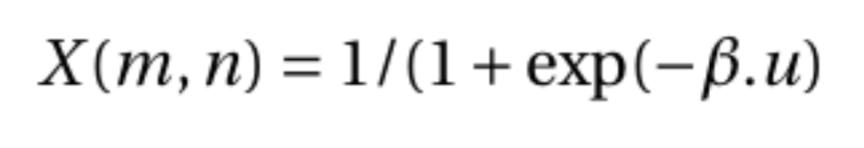

In [28]:
Image('sigmoide.png')

In [29]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))


###### 3.4 Treinamento
Para a rede, foi utilizado um treinamento supervisionado, utilizado o dataset construído conforme os passos anteriores. Os vetores de peso foram iniciados com valores aleatórios, assim como o viés, enquanto o conjunto de dados foi embaralhado randomicamente.

In [40]:
learning_rate = 0.2
costs = []

#pesos e bias aleatório
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
b = np.random.randn()

#Criando um numpy array apenas com os valores de cada feature
data = iris_labeled_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'label']].values
labels = []

#Definindo as labels como 0 ou 1
#Iris-Versicolor = 1
#Iris-Virginica = 0

        
repetitions = 10000

for i in range(0, repetitions):
    #Escolhendo um ponto aleatorio do dataset a cada iteracao
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 +b
    prediction = sigmoid(z)
    target = point[4]
    
    #erro ao quadrado
    cost = np.square(prediction - target)
    
    dcost_prediction = (prediction - target)
    
    #Derivada da sigmoid, aplicando a soma dos pesos e bias atual
    dprediction_dz = sigmoid_p(z)
    
    #Dados de input e colocando 1 como valor de bias
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_dw4 = point[3]
    dz_db = 1
    
    #A curva do erro com a derivada da sigmoid
    dcost_dz = dcost_prediction * dprediction_dz
    
    #As curvas do erro vezes o input original
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_dw4 = dcost_dz * dz_dw4
    dcost_db = dcost_dz * dz_db
    
    #Calculando novos pesos e valor do bias
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    w4 = w4 - learning_rate * dcost_dw4
    b = b - learning_rate * dcost_db
    
    
    #Fazendo o gráfico para apresentacao das iteracoes
    if i % 10 == 0:
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point [0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
            prediction = sigmoid(z)
            
            target = point[4]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))    
    


###### 4 Resultados:
A cada época o conjunto de teste foi utilizado para verificar o erro da rede. Pode-se observar no gráfico abaixo, que com a conclusão das 100000 épocas utilizadas, o erro convergiu para 0.

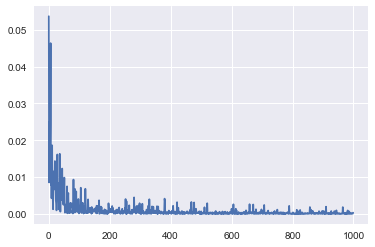

In [38]:
plt.plot(costs)

###### 4.1 Testes

Criamos uma cópia do dataset com as labels 0 ou 1, assim como fizemos para o treinamento, e prosseguimos com os testes para os pesos já reajustados como mostrado abaixo

In [32]:
iris_labeled_test = iris_test.copy()

for index, row in iris_labeled_test.iterrows():
    if row['Species'] == 'Iris-setosa':
        iris_labeled_test.loc[index, 'label'] = 1
    else:
        iris_labeled_test.loc[index, 'label'] = 0

    Podemos observar que o erro é minimo, na casa dos 0.00001, e que a predição está funcionando corretamente

In [39]:
data = iris_labeled_test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'label']].values


        
for i in range(len(data)):
    point = data[i]
    display(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    target = point[4]
    
    print("Resposta : {}".format(prediction) + " [+] Label Correta: " + str(point[4]))


array([6.3, 2.5, 4.9, 1.5, 0. ])

Resposta : 0.000952112760078 [+] Label Correta: 0.0


array([6.1, 2.8, 4.7, 1.2, 0. ])

Resposta : 0.00366830820022 [+] Label Correta: 0.0


array([5.8, 2.7, 4.1, 1. , 0. ])

Resposta : 0.0162115372774 [+] Label Correta: 0.0


array([5.4, 3.7, 1.5, 0.2, 1. ])

Resposta : 0.99354033417 [+] Label Correta: 1.0


array([4.9, 3. , 1.4, 0.2, 1. ])

Resposta : 0.980252494492 [+] Label Correta: 1.0


array([6.3, 3.3, 4.7, 1.6, 0. ])

Resposta : 0.00466276168459 [+] Label Correta: 0.0


array([6.1, 2.9, 4.7, 1.4, 0. ])

Resposta : 0.00309259271608 [+] Label Correta: 0.0


array([5.6, 2.9, 3.6, 1.3, 0. ])

Resposta : 0.0410929170308 [+] Label Correta: 0.0


array([5.1, 3.5, 1.4, 0.2, 1. ])

Resposta : 0.991860676139 [+] Label Correta: 1.0


array([6.7, 3.1, 4.4, 1.4, 0. ])

Resposta : 0.0123819114443 [+] Label Correta: 0.0


In [34]:
# 0 para Iris-setosa e 1 para Iris-versicolor
def guess_flower(SepalLength, SepalWidth, PetalLength, PetalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + PetalLength * w3 + PetalWidth * w4 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [35]:
guess_flower(4.8, 3.0, 1.4, 0.3)


Iris-versicolor


###### 5 Conclusão:
A partir da análise do projeto, pode se concluir que o treinamento de uma rede neural, composta por um neurônio, foi suficiente para realizar a classificação precisa entre os dois gêneros de flores. Desse modo, a rede mostrou-se eficiente para realizar o propósito a ela indicado.

In [36]:
print "Obrigado!"

Obrigado!
